# Single  Qubit Gates

## 1. The Pauli Gates

### 1.1 The X-Gate

In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

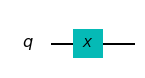

In [2]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

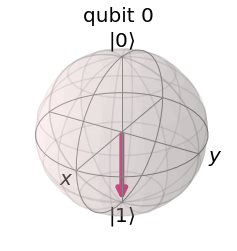

In [3]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

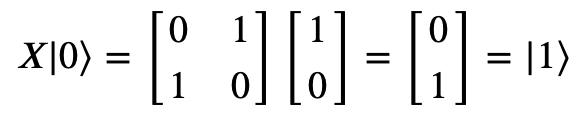

X-gate(NOT-gate)はブロッホ球のx軸を中心としたπラジアンの回転と考えることができる。

### 1.2 The Y & Z-Gates

X-gateと似ているのが、Y-gateとZ-gate。
Y-gateとZ-gateはそれぞれ、y軸とz軸を中心として、ベクトルをπラジアン回転させる。

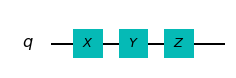

In [4]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

## Digression:The X,Y & Z-Bases

|0>と|1>の状態の時、Z-gateはqubitに何の影響も与えていないように見える。
これは、これらがZ-gateの固有状態だから。
同様に、X-gateの固有状態を|+> |->と呼ぶ。

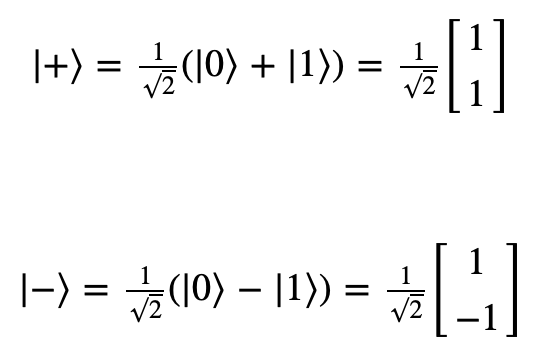

Y-gateの固有状態はあまり一般的ではないが、次のように呼ばれる。

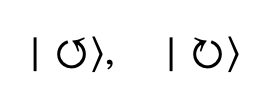

eigenstates…固有状態

eigenvalues…固有値

computational basis…計算の基礎

##  3. The Hadamard Gate

アダマールゲート(H-gate)は基本的に量子ゲート。
アダマールゲートによって、ブロッホ球の極から離れて、|0>と|1>のsuperpositionを作成できる。

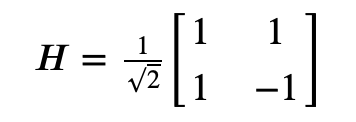

アダマールゲートは次のように変換する。

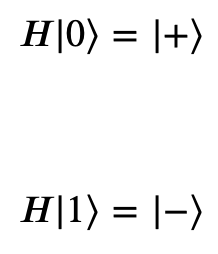

これは、ブロッホベクトル[1,0,1](x軸とz軸の間の線)を中心とする回転。
または、xとzの基点間のqubitの状態の変換と考えることができる。

## 4. Digression: Measuring in Different Bases

Z軸が本質的に特別というわけではなく、他にも無限に多くの基底があることがわかった。
測定と同様に、計算基準(Z基準)で常に測定する必要はなく、任意の基準でqubitを測定できる。
例として、X基準で測定してみましょう。|+>または|->のいずれかを測定する確率を計算できます。

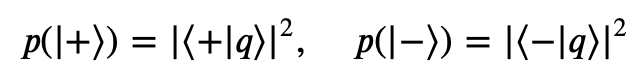

そして測定後、これら2つの状態のいずれかにqubitがあることが保証されます。
QIskitはZ基準での測定しかできない為、アダマールゲートを使用して、独自に作成する必要があります。

In [5]:
from qiskit.extensions import Initialize # Import the Inititialize function
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw()

┌──────┐┌───┐┌─┐┌───┐
q_0: ┤ init ├┤ H ├┤M├┤ H ├
     └──────┘└───┘└╥┘└───┘
c_0: ══════════════╩══════

上記の簡単な演習では、2つのHゲートの間にZゲートを挟んでXゲートを作成できることを確認しました。

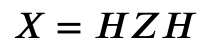

Z基底から始まって、HゲートはqubitをX基底に切り替え、ZゲートはX基底でNOTを実行し、最後のHゲートでqubitをZ基底に戻しています。

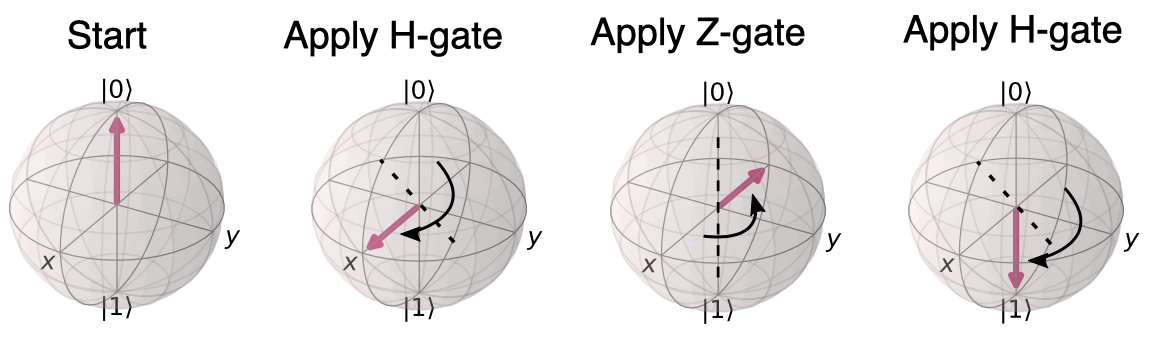

行列を乗算することで、これが常にXゲートのように動作することが確認できます。

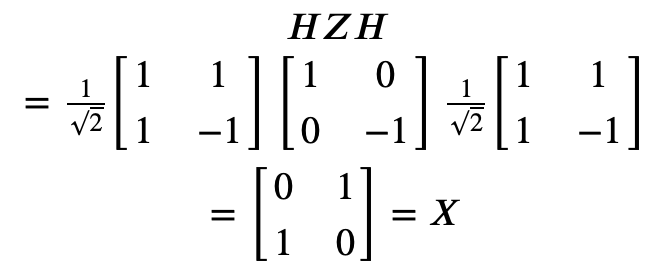

同じロジックで、2つのHゲートの間にZ測定を挟むことにより、X測定を作成しました。

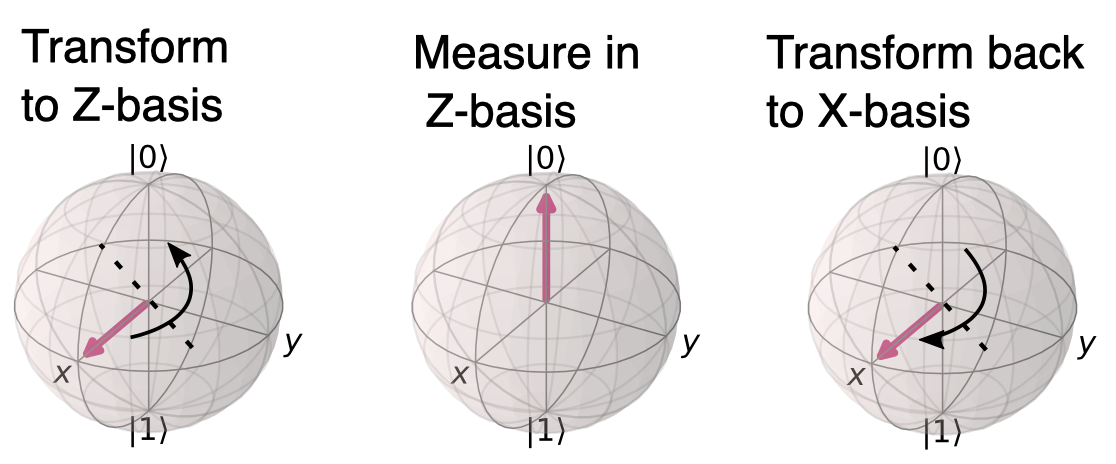

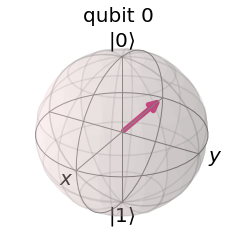

In [6]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector

|1>の状態でqubitを初期化しましたが、測定後|+>または|->の状態にqubitを折り畳んでいることがわかりま状態でqubitを初期化しましたが、測定後|+>または|->の状態にqubitを折り畳んでいることがわかりま表示されますがす。
セルを再度実行すると、異なる結果が表示されますが、qubitの最終的な状態は常に|+>か|->になります。

さまざまな基準で測定することで、ハイゼンベルクの有名な不確実性原理を実際に見ることができます。
Z基準で状態を測定する確実性があると、X基準で特定の状態を測定する確実生が全て無くなり、その逆も同様です。
よくある誤解は、不確実性は機器の制限によるものであるというものですが、ここでは不確かさが実際のqubitの性質の一部であることがわかります。

例えば、qubitを|0>状態におくと、Z基準での測定値は確実に|0>になりますが、X基準での測定値は完全にランダムです。
同様に、qubitを|->の状態におくと、X基準での測定値は確実に|->になりますが、Z基準での測定値は完全にランダムになります。

より一般的には、私たちの量子システムがどのような状態にあるにせよ、常に特定の結果を持つ測定値があります。

Hゲートの導入により、いくつかの興味深い現象を探ることができましたが、量子操作にはまだまだ多くの制限があります。ここで、新しいタイプのゲートを紹介しましょう。

## 5. The Rϕ-gate 

Rϕゲートはパラメーター化されています。つまり、何をすべきかを正確に伝えるための数字(φ)が必要です。Rϕゲートは、Z軸を中心にφの回転を実行します。(そのためRzゲートとしても知られています。)

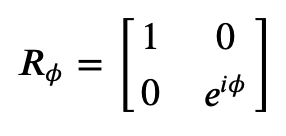

φは実数です。
Qiskitでは、Rϕゲートは"rz(phi, qubit)"というコマンドで使用できます。

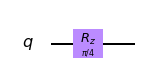

In [7]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

Zゲートがφ = πのRϕゲートの特殊なケースであることに気づくでしょう。
実際、この章で言及する3つの、より一般的に参照されるゲートは全て、Rϕゲートの特殊なケースです。

## 6. The I, S and T-gates

### 6.1 The I-gate

まずIゲート(別名"Id-gate" または "Identity gate")を見ていきましょう。
これは単に何もしないゲートです。
その行列は単位行列。

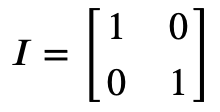

回路内のどこかにIゲートを適用しても、qubitの状態には影響がない為、これをゲートと見なすのは非常に興味深いことでしょう。

これには主に2つ理由があります。
1つは、計算でよく使用されることです。例えば、Xゲートが自身の逆であることを証明するとします。

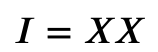

2つ目は、実際のハードウェアを考えたときに、「何もしない」または「なし」の操作を指定することがしばしば役立つからです。

### 6.2 The S-gates

次に紹介するゲートはSゲート(√Zゲート)です。これはφ = π/2のRϕゲートです。ブロッホ球の周りを1/4回転します。

この章でこれまでに紹介したゲートたちとは異なり、Sゲートはそれ自体が逆でないことに注意してください。

その代わりに、S†-gate("S-dagger", "Sdg", "√Z†-gate")を使います。
S†ゲートはφ = -π/2のRϕゲートです。

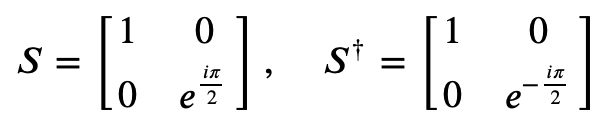

√Z†ゲートという名前は、2つの連続して適用されたSゲートが1つのZゲートと同じ効果を持つからつけられた名前です。

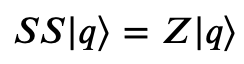

この表記法は、量子計算全体で共通です。

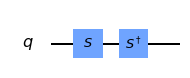

In [8]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

### 6.3 The T-gate

Tゲートはとてもよく使われるゲートで、φ = π/4のRϕゲートに相当します。

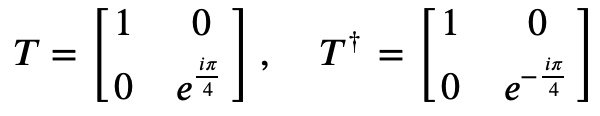

Sゲートと同様に、Tゲートは4√Zゲートとしても知られています。

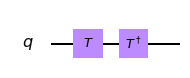

In [9]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl')

## 7. General U-gates

ここまで見てきたように、I、Z、S、Tゲートは全て、より一般的なRϕゲートnの特殊なケースです。同様に、U3ゲートは全ての単一qubit量子ゲートの中で最も一般的です。これは、次のような形式でパラメータ化されたゲートです。

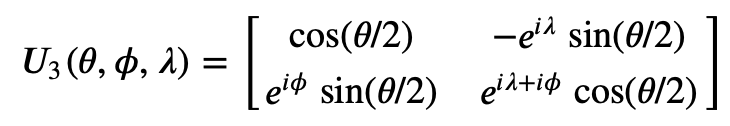

この章で紹介した全てのゲートはU3(𝜃,𝜙,𝜆)として指定できますが、回路図でこれを見ることはほとんどありません。おそらくこれを読むのが難しい為です。

QiskitはU2ゲートとU1ゲートを提供しています。これらは、それぞれθ = π/2とθ= φ = 0であるU3ゲートの特定のケースです。 U1ゲートがRϕゲートと同等であることがわかると思います。

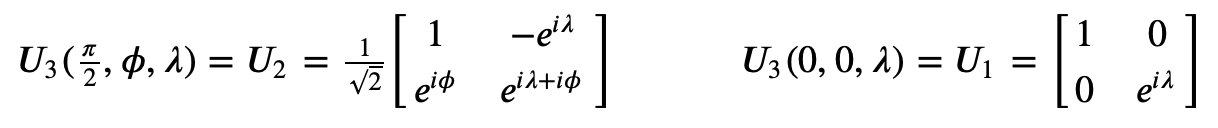

実際のIBM量子ハードウェアで実行する前に、全ての単一量子ビット操作はU1、U2、及びU3にコンパイルされます。この為、物理ゲートと呼ばれることもあります。

ここでは言及していませんが、可能なゲートの数は無限であり、これにはRxゲートとRyゲートも含まれています。また、Z基準については、標準の計算基準として選択されていることを除いて、特別なことは何もないことにも注意してください。その為、SゲートとTゲートの名前はありますが、√Xゲートや4√Yゲートといった名前はありません。